In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
dataset = pd.read_csv('Mall_Customers.csv')

In [20]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [22]:
# dataset = dataset.drop('CustomerID', axis = 1) 
# dataset = dataset.drop('Genre', axis = 1) 
# dataset.fillna(method ='ffill', inplace = True) 
# dataset.head(5)

In [24]:
# Preprocessing the data to make it visualizable 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
# Scaling the Data 
# scaler = StandardScaler() 
# X_scaled = scaler.fit_transform(dataset) 
  
# Normalizing the Data 
# X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
# X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
# pca = PCA(n_components = 2) 
# X_principal = pca.fit_transform(X_normalized) 
# X_principal = pd.DataFrame(X_principal) 
# X_principal.columns = ['P1', 'P2'] 
  
# X_principal.head(2) 

In [66]:
X = dataset.iloc[:, [3, 4]].values

In [68]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters = 5, affinity ='nearest_neighbors')
labels = sc.fit_predict(X)

C:\Users\PrakashBaskaran\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\PrakashBaskaran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [70]:
labels

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [72]:
supervised=dataset
supervised['Cluster_group']=labels
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


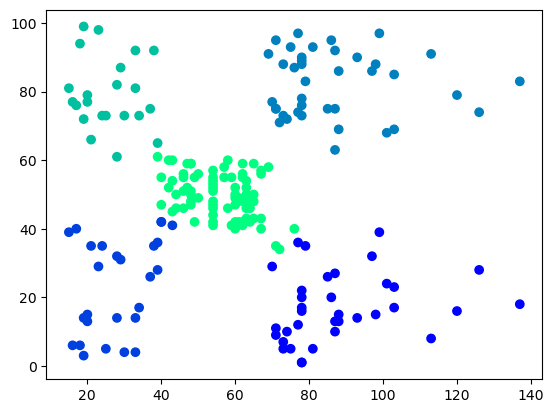

In [74]:
# Visualizing the clustering 
plt.scatter(supervised['Annual Income (k$)'], supervised['Spending Score (1-100)'],  
           c = labels, cmap =plt.cm.winter) 
plt.show() 

In [76]:
supervised.to_csv("spectral_cluster.csv",index=False)

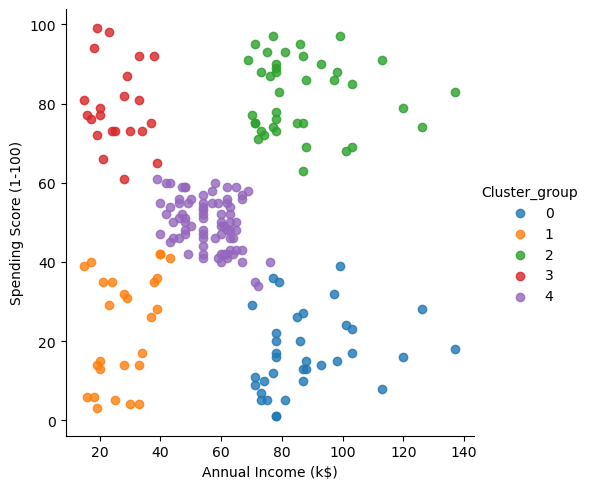

In [78]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True)